In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error

# Operazioni preliminari

### Caricamento dei dati

Carichiamo i dati dalla libreria *datasets* di Sci-kit.  
Le features sono conservate sotto la key *data*, le labels sotto *target* e il nome delle features sotto *feature_names*.  
Estrapoliamo queste tre informazioni:

In [2]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
df['target'] = diabetes['target']

Le feature corrispondono ai seguenti significati:

In [3]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Non ci sono valori nulli in questo dataset.

### Scaling

La documentazione dichiara che i dati sono già stati scalati. Controlliamo che sia vero:

In [5]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Tutti i dati risultano effettivamente scalati, con una media e deviazione standard attorno allo 0

### Visualizzazione delle relazioni

Plottiamo un pairplot per vedere intuitivamente quali relazioni sussistono tra le variabili indipendenti presenti.  
Differenziamo i pazienti per sesso.

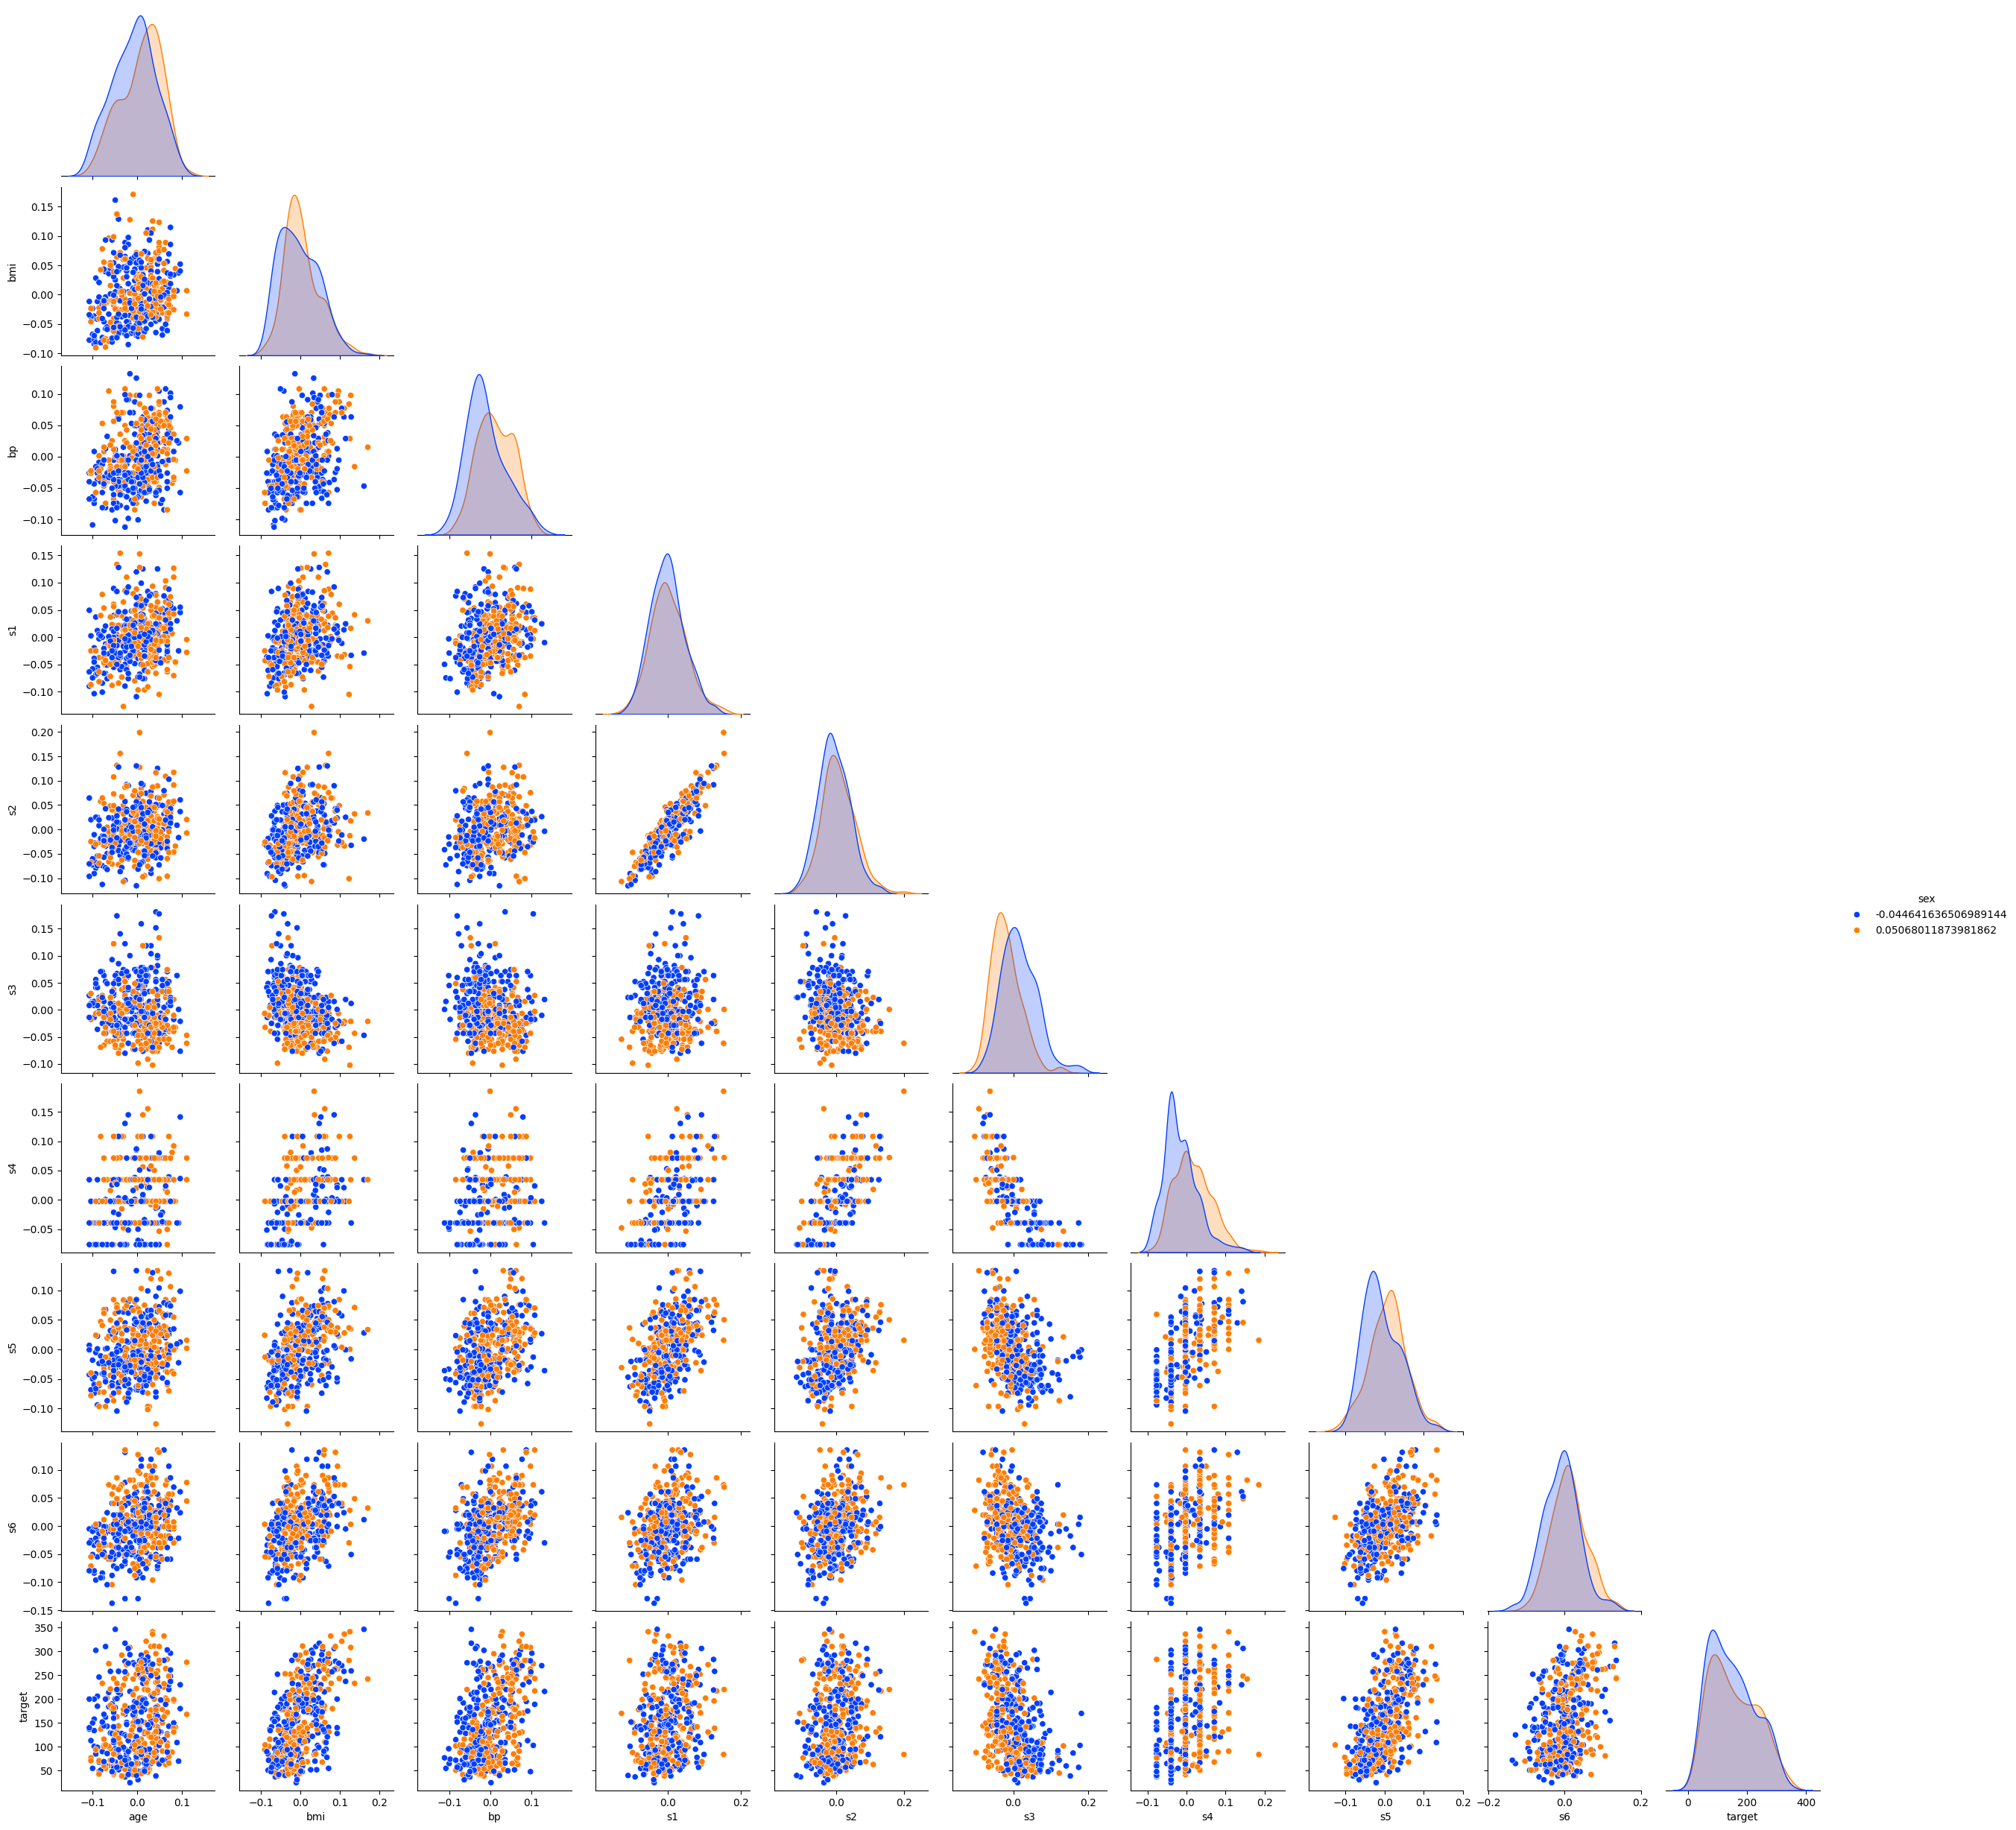

In [6]:
sns.pairplot(df, hue='sex', palette='bright', corner=True)

Si nota una forte correlazione tra le variabili *s1* ed *s2*.  
Proviamo a utilizzare una heatmap per avere anche valori numerici: 

<Axes: >

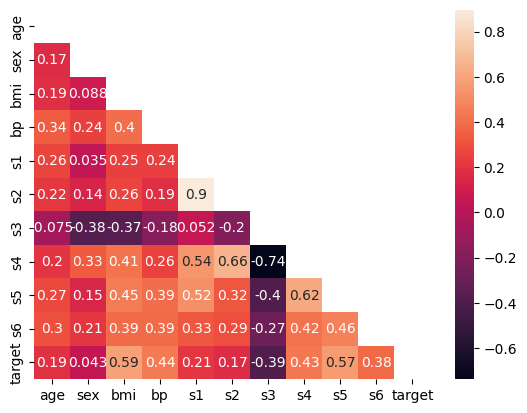

In [7]:
matrix = np.triu(df.corr()) #serve per mostrare solo il triangolo inferiore della matrice

sns.heatmap(df.corr(), annot=True, mask=matrix)

Ci sono anche altre relazioni considerevoli, come quella tra *s4* ed *s5* o tra *s2* ed *s4*. C'è anche una forte correlazione lineare negativa tra *s3* ed *s4*.  
Rispetto al target, le variabili che sono maggiormente correlate sono invece *bmi* e *s5*. Ciò significa che all'aumentare della BMI aumenta anche il progresso del diabete, e così anche il livello di trigliceridi

---

Separiamo i dati in *training* e *test*:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], test_size=0.3, random_state=0)

# Ridge Regression

Per valutare il modello utilizzeremo queste metriche: 
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error
- R<sup>2</sup>

La Ridge Regression opera una regolarizzazione L2, per cui introduce una penalità ai coefficienti più alti del modello.  
A differenza della regolarizzazione L1, le features non verranno effettivamente eliminate, ma in alcuni casi i loro coefficienti potrebbero diventare così bassi da renderle praticamente ininfluenti.  
Per questa ragione, non svolgeremo nessuna procedura di *feature selection* a monte. 

Impostiamo la Ridge Regression usando la classe ***RidgeCV***, che ci permette di compiere un'ottimizzazione di *alpha* senza utilizzare *GridSearch*.  
*Alpha* ha lo scopo di quantificare la penalità che verrà assegnata ai coefficienti più alti del modello.  
Faremo una 10fold Cross-Validation. 

In [27]:
ridge = RidgeCV(alphas=np.geomspace(0.001, 1, num=10),
               cv=10,
               scoring='neg_root_mean_squared_error').fit(X_train, y_train)

Vediamo qual è il valore migliore di *alpha* e quali sono stati i coefficienti assegnati alle variabili:

In [26]:
print(
f'''Miglior valore per alpha: 
{ridge.alpha_}

Coefficienti assegnati dal modello:''')
for label, parameter in zip(diabetes['feature_names'], ridge.coef_):
    print(label,":", parameter)

Miglior valore per alpha: 
0.046415888336127774

Coefficienti assegnati dal modello:
age : -42.54070743045515
sex : -178.4978820313649
bmi : 553.9065316025664
bp : 263.61290145980956
s1 : -84.38723500984618
s2 : -88.15638984979425
s3 : -226.3013124558218
s4 : 73.64338336260596
s5 : 523.7072984554856
s6 : 43.524996371451145


Si vede che le due features maggiormente importanti sono l'indice di massa corporea (BMI) e il livello di trigliceridi (s5).  
Altre variabili come invece l'età e il livello di zucchero nel sangue (s6) sono state invece ritenute relativamente poco influenti, seppur non vicine allo zero.

Svolgiamo la predizione e stampiamo lo score risultante:

In [12]:
pred = ridge.predict(X_test)

scores = pd.DataFrame({'Modello':['Regressione Ridge - Test'],
                        'MAE':[mean_absolute_error(y_test, pred)],
                      'MSE':[mean_squared_error(y_test, pred)],
                      'RMSE':[root_mean_squared_error(y_test, pred)],
                      'R2':[r2_score(y_test, pred)]})

---

Per verificare che non sia presente overfitting, un'idea può essere quella di valutare le metriche anche sul training set e fare il paragone con quelle del test set: se i valori saranno molto migliori per il primo, allora ci troveremo di fronte a overfitting. 

In [13]:
pred_train = ridge.predict(X_train)

scores.loc[1] = ['Regressione Ridge - Training',
                mean_absolute_error(y_train, pred_train),
                mean_squared_error(y_train, pred_train),
                root_mean_squared_error(y_train, pred_train),
                r2_score(y_train, pred_train)]

scores

,Modello,MAE,MSE,RMSE,R2
0,Regressione Ridge - Test,44.295259,3050.012251,55.226916,0.402133
1,Regressione Ridge - Training,43.659836,2839.309869,53.285175,0.548344


I parametri tra i due sono confrontabili, a parte l'R<sup>2</sup>.  
La differenza di quest'ultimo, vedendo che le altre metriche sono molto simili tra di loro, potrebbe essere dovuta al fatto fisiologico che il modello abbia già visto i dati del training set e che quindi performi meglio.  
Guardando nel complessivo, sembra che l'overfitting non sia tanto impattante da compromettere l'analisi.

---

Plottiamo uno scatterplot che abbia sulle x i valori predetti e sulle y i valori reali:

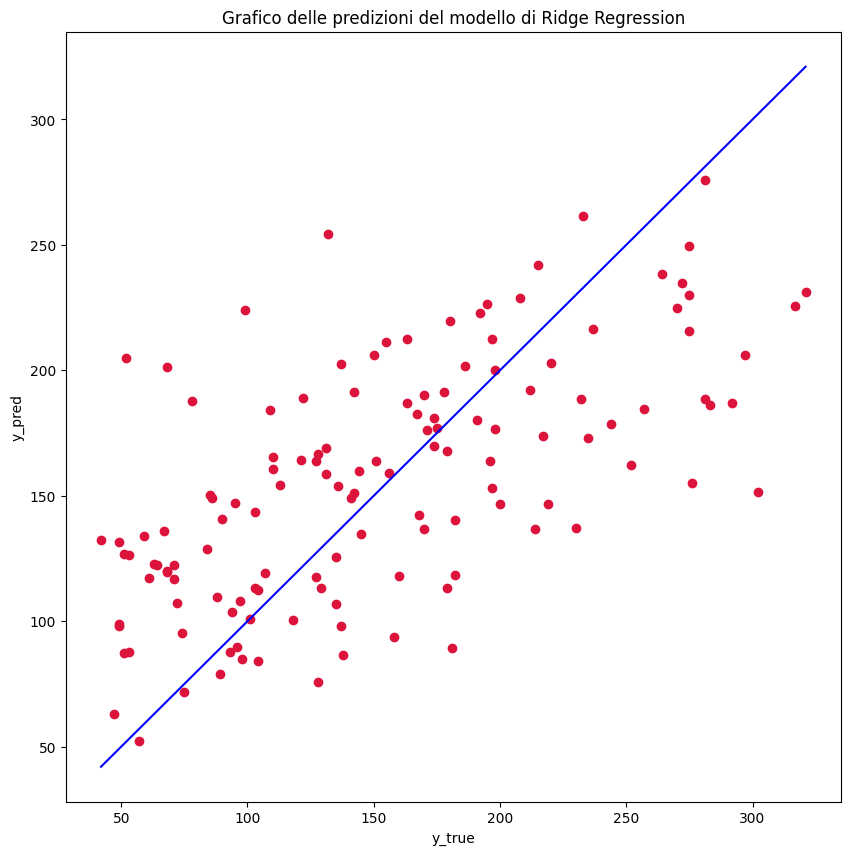

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='crimson')
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title('Grafico delle predizioni del modello di Ridge Regression')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1,p2], [p1,p2], 'b-')

In generale, sembra che il modello sia abbastanza equilibrato: non ci sono aree dove predice sistematicamente più in basso o più in alto.  
Nonostante l'R<sup>2</sup> non sia molto alto, il modello coglie il rapporto che sussiste tra le features (specialmente BMI e S5) e il target.